## Imports

In [ ]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-12 22:01:35--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc71db52ae6761722cad93c9b8d0.dl.dropboxusercontent.com/cd/0/inline/CQ5IfU4HpqXrraV2AJHiA3XF7E8hpXKYSy46USL81luCMk_fWSunp3pFTEfvsEXjLv-KvOGyzpZgd3fy5QVgwwTjYr1DOJJ9-gB5RxUxeBafIBm0dr-uAL7-766S4P_om0st8JDF-vPihcfjt8rlqe7N/file# [following]
--2024-04-12 22:01:35--  https://uc71db52ae6761722cad93c9b8d0.dl.dropboxusercontent.com/cd/0/inline/CQ5IfU4HpqXrraV2AJHiA3XF7E8hpXKYSy46USL81luCMk_fWSunp3pFTEfvsEXjLv-KvOGyzpZgd3fy5QVgwwTjYr1DOJJ9-gB5RxUxeBafIBm0dr-uAL7-766S4P_om0st8JDF-vPihcfjt8rlqe7N/file
Resolving uc71db52ae6761722cad93c9b8d0.dl.dropboxusercontent.com (uc71db52ae6761722cad93c9b8d0.dl.dropboxusercontent.com)... 162.125.80.15, 26

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [ ]:
file_path = '/HousingData.csv'
data = pd.read_csv(file_path)

missing_values = data.isnull().sum()
print("Missing values in dataset:")
print(missing_values)

data.fillna(data.mean(), inplace=True)

Get a brief description of the dataset

In [ ]:
print("\nDataset Information:")
print(data.info())

print("\nSummary of Dataset:")
print(data.describe())

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [ ]:
X = data.drop('MEDV', axis=1).values
print(X)




[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

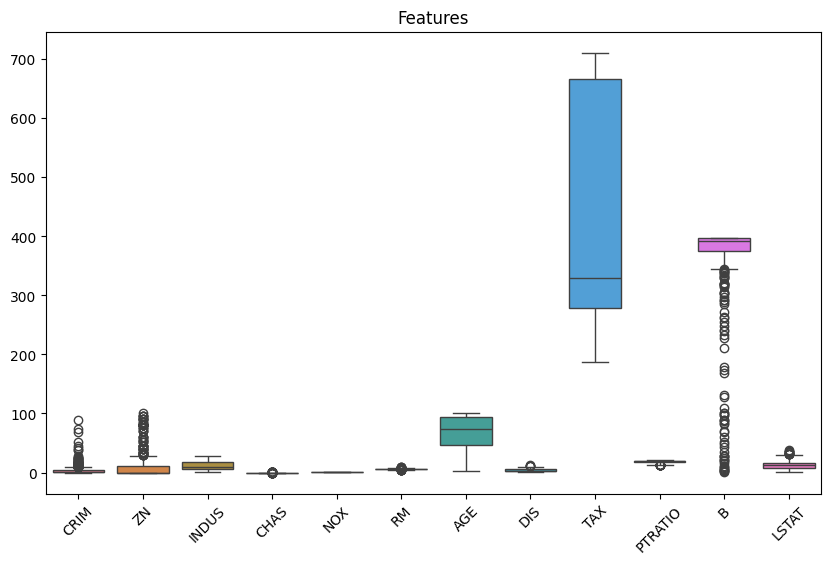

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop('MEDV', axis=1))
plt.title('Features')
plt.xticks(rotation=45)
plt.show()
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

add polynomial features to increase model complexity!



In [ ]:
y = data['MEDV'].values
poly_features = PolynomialFeatures(degree=2)
X_polynomial = poly_features.fit_transform(X_scale)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [ ]:
y = data['MEDV'].to_numpy()



Split the dataset into two parts such that the training set contains 80% of the samples.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_polynomial, y, test_size=0.2)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

[ 1.39675477e-15  2.58289131e-01  9.89103057e-01  8.86369956e-01
 -1.68898339e+00 -1.78776343e+00  3.65086593e+00 -1.67024550e+00
 -3.14001178e+00 -1.33586132e+00 -8.68614766e-01 -3.80128818e-01
 -2.92883842e+00  1.84823430e-01  1.52055392e+00  5.11517582e+00
  2.41811638e+00 -2.66567208e+00 -2.15833254e-01 -1.18264707e+00
 -1.95447387e+00 -1.70657988e+00 -3.65654679e+00  3.19038836e-01
  4.07390541e-01 -3.00101102e-01  2.16126009e-01  1.31006376e-01
 -2.33494185e+00 -9.88495391e-02  5.74015256e-01 -2.73244972e-01
  2.58204317e+00 -4.99388179e-01 -1.23808103e+00 -1.67773013e+00
  8.55401287e-01 -1.45307605e-01  1.41120933e-01  7.52971736e-01
  1.74849134e+00  1.85616458e+00 -1.81890577e+00 -6.22008610e-01
  4.06043099e-01 -1.33821803e+00  8.88559138e-01 -9.69312579e-01
 -1.09675082e+00  4.59762344e-01 -6.40384583e-02  6.91303142e-01
 -2.54993279e-01  2.25614628e-02 -5.04318734e-01  5.24540427e-01
 -1.29235139e-01 -1.88315541e-01  4.03308579e+00  5.39259528e-02
 -8.81805086e-01 -4.61254

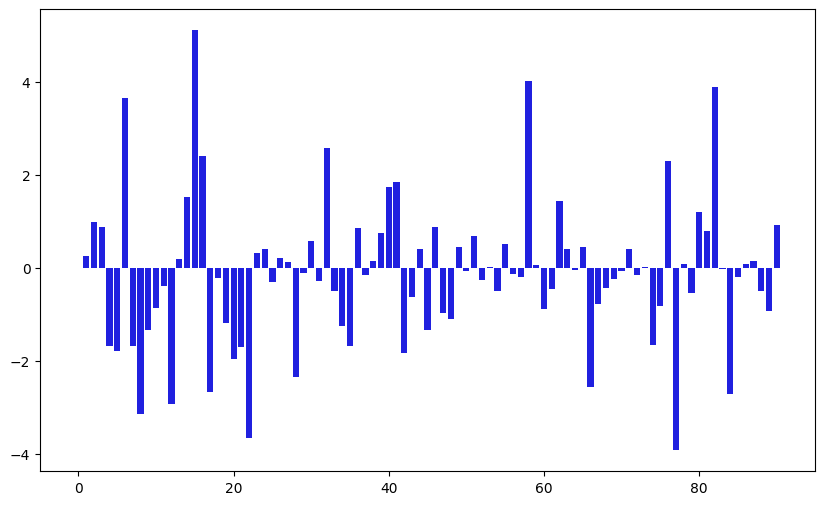

In [ ]:
linear_coefficients = linear_reg.coef_
print( linear_coefficients)

plt.figure(figsize=(10, 6))
sns.barplot(linear_coefficients, native_scale=True, color = 'BLUE')
plt.show()


Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [ ]:
train_r2_score = linear_reg.score(X_train, y_train)
y_train_predict = linear_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_predict)

print("R² score on training :", train_r2_score)
print("MSE:", train_mse)

R² score on training : 0.9148122540585776
MSE: 7.495765738346277


Predict the value of "y" for each "x" belonging to the "testing" set

In [ ]:
y_test_predict = linear_reg.predict(X_test)

test_r2_score = r2_score(y_test, y_test_predict)
test_mse = mean_squared_error(y_test, y_test_predict)

print("\nR² score on testing:", test_r2_score)
print("MSE:", test_mse)


R² score on testing: 0.7753831717332422
MSE: 15.766649668477434


# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [ ]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.01)

Get the coefficients of the variables and visualize it.

Lasso Coefficients:
 [ 0.00000000e+00  2.83440206e-01  2.00800772e-01 -3.59904977e-04
 -0.00000000e+00 -1.82998892e+00  3.30420175e+00 -1.29408635e+00
 -2.93414830e+00 -7.78046754e-01 -6.15547651e-01  8.21438861e-01
 -3.16652160e+00  1.45818219e-01 -5.72215417e-01  0.00000000e+00
  3.74009836e+00 -1.92983858e+00 -1.72337091e-01 -0.00000000e+00
 -1.40849042e-03  1.78084248e-01  0.00000000e+00 -2.43753954e-02
  6.34260943e-02 -2.63297448e-02  1.54415787e-01  1.62553928e-01
 -7.76160772e-01 -5.23716386e-02 -5.99243862e-02 -2.86506178e-01
  9.19355240e-01  2.35031964e-02 -3.15204743e-01 -4.08411906e-01
  1.64888515e-01  3.56588750e-01  1.15382962e+00  2.84816149e-01
  7.23071862e-01  1.40893066e+00 -6.83147156e-01 -1.15851248e-01
  0.00000000e+00 -1.01205973e+00  4.40094336e-01 -1.02385240e+00
 -7.71106271e-01 -2.34584302e-01 -3.83526209e-01  0.00000000e+00
 -2.69017040e-01  0.00000000e+00 -3.17743044e-01 -0.00000000e+00
 -7.45228974e-01 -2.99613980e-01  2.65900008e+00 -0.00000000e+00
 -9.

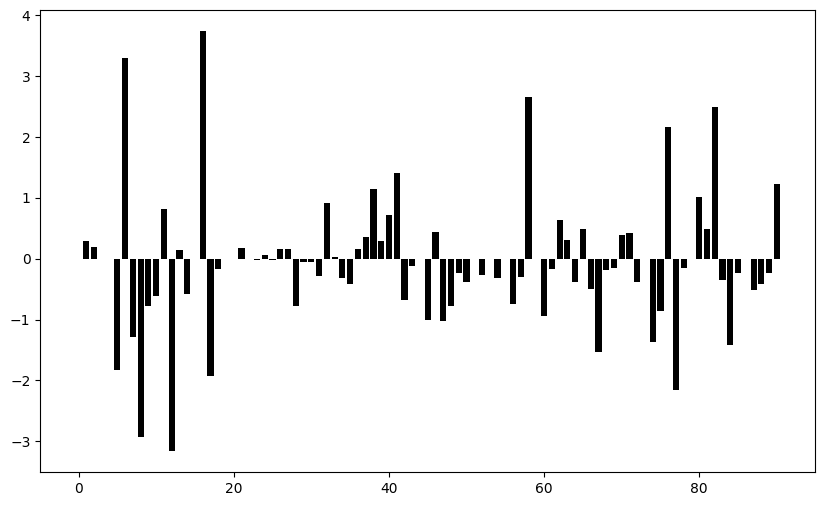

In [ ]:
lasso_coefficients = lasso_reg.coef_
print("Lasso Coefficients:\n", lasso_coefficients)

plt.figure(figsize=(10, 6))
sns.barplot(lasso_reg.coef_, native_scale=True, color = 'BLACK')

plt.show()

1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

1. It causes some coefficients to get closer to zero; overall, it identifies the important features and discards the less significant ones.

2. As the value of (alpha) increases, the penalty on the absolute values of the coefficients becomes stronger. Increasing it causes more coefficients to reach zero and increases the sparsity of the model.

Get the score value on train *dataset*


In [ ]:
lasso_train_r2_score = lasso_reg.score(X_train, y_train)
y_train_pred_lasso = lasso_reg.predict(X_train)
lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)

print("R² score on training (Lasso):", lasso_train_r2_score)
print("MSE on training (Lasso):", lasso_train_mse)
print("\n",y_train_pred_lasso)

R² score on training (Lasso): 0.8947471351684364
MSE on training (Lasso): 8.024718434831751

 [22.05320868 25.31505374 25.24875617 23.8834534  21.18672068  7.89156902
 21.87304535 27.21780671 17.63254241 19.89144272 21.79511837 31.53723814
 23.99229406 18.48904636 14.37293901 22.87861487 15.03825256 27.65212007
 27.18503442 22.29367255 23.8974095  16.55189373 24.37795511 16.27476013
 19.35589949 11.68160797 14.98818636 15.023353   19.20603594 32.86774639
 20.95801554 22.01643061 18.21360205 19.93500727 22.23498117 17.1493518
 25.87975734 14.08248737 18.90631299 18.05272343 15.67182899 23.77726181
 16.96784719 29.39291078 18.09683625 31.41428338 23.08607978 23.56645386
 16.82759157  9.97891839 20.18257663 23.22054411 33.86651926 17.00882075
 14.65199938 18.28043151 24.20488291 21.78257403 15.82307849 17.86225937
 25.71493635 14.67062701 53.96331101 29.74437481 19.32415164 35.81377418
 20.85128452 34.94863851 20.65421566 29.47294299 14.90998172 22.94071125
 26.79476529 20.50827817 17.765

Predict the value of "y" for each "x" belonging to the "testing" set

In [ ]:
y_pred_lasso = lasso_reg.predict(X_test)

lasso_test_r2_score = r2_score(y_test, y_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_pred_lasso)

print("\nR² score on testing (Lasso):", lasso_test_r2_score)
print("MSE on testing (Lasso):", lasso_test_mse)
print("\n",y_pred_lasso)


R² score on testing (Lasso): 0.8910350512215238
MSE on testing (Lasso): 12.172105765394877

 [ 7.3057512  18.88650486 22.07080101 25.64128659 10.46022554 25.64818569
 23.88880506 28.81724915 45.34269405 21.10902079 22.45964862 35.46976352
 20.38990781 26.0413881  39.44873223 22.96884235 33.56087599 15.06200324
 23.67192729 24.1825059  16.19167522 20.87178582 26.90514317 22.16045791
 18.86383721 21.23712599 10.54387497  7.68679741 32.97482092  9.33644405
 47.24540539 21.61835579 21.25342816 14.76538385 23.6890458  22.35330115
 32.01437935 21.71742125 18.81535657 43.5326813  10.25406173 34.19078435
 44.7775816  16.62126683 21.13875091 19.17318839 16.44777597 30.13849531
 47.69805809 11.83071769 27.9112863  48.20044963 15.26657509 28.70738833
 25.86831836  9.69237709 20.39758537 28.11541861 35.10431992 23.65651865
 18.12972078 27.73378483 15.51760039 28.10850524 19.37171193 21.01467534
 21.64727753 40.80622196 25.84124438 35.60004617 52.11256185 14.17622754
 11.06950103 25.07347816 10.12

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

Get the coefficients of the variables and visualize it.

Coefficients of the variables (Ridge):
 [ 0.          0.71097574  0.18232671 -0.24454002 -2.10480622 -1.93345719
  3.31110207 -1.40258057 -3.15252886 -0.57259658 -0.85717852  0.84619281
 -3.16296587  0.11648538 -1.33314971 -0.41526737  3.61407297 -2.24411389
 -0.1394842  -0.28703462 -1.00323904  0.18989209 -1.0118476   0.02441893
  0.18125184 -0.05978646  0.27135518  0.2682204  -1.41147715 -0.23110236
  0.073419   -0.47570223  1.31591768  0.02452056 -1.33267679 -0.89641391
  0.37282318  0.31569221  1.27232596  0.46501349  0.98558728  2.01445567
 -0.91030217 -0.18775336  0.31594973 -0.87116037  1.0673158  -1.16194184
 -0.85713941 -0.36113545 -0.54600085  0.23182161 -0.3900487  -0.01061907
 -0.27369547 -0.07355029 -0.7096911  -0.26252993  3.19758311  0.17777578
 -1.27412421 -0.37516545  0.71190951  0.32959354 -0.36357716  0.68825664
 -0.60031672 -1.5649091  -0.21120715 -0.21789552  0.43018284  0.453816
 -0.5432761   0.039567   -1.46294471 -0.98795486  2.48223648 -2.61309208
 -0.32396929 

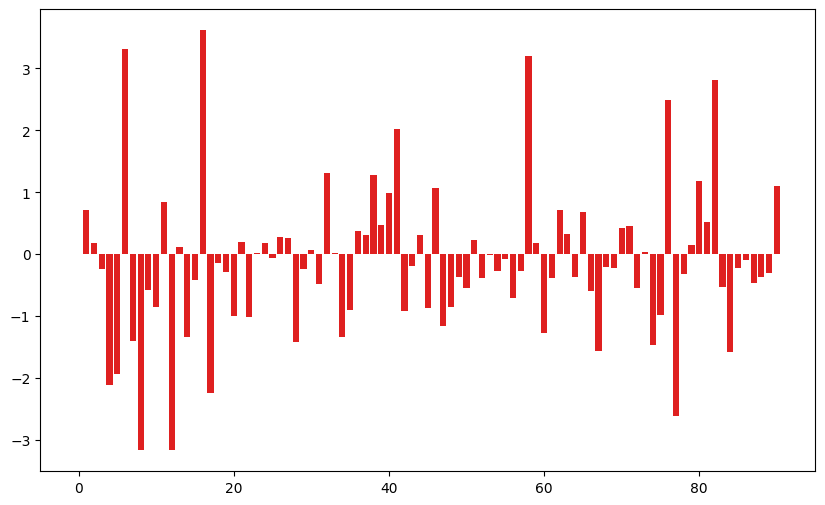

In [ ]:
ridge_coefficients = ridge_reg.coef_
print("Coefficients of the variables (Ridge):\n", ridge_coefficients)


plt.figure(figsize=(10, 6))
sns.barplot(ridge_coefficients, native_scale=True, color = 'RED')
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

**1. Differences:**

* **Lasso** can perform *feature selection* by shrinking some coefficients exactly to zero, whereas **Ridge** can only shrink coefficients *toward* zero.
* **Lasso** tends to produce a *sparse model*, while **Ridge** results in a *more continuous distribution* of coefficient values.

**2. As alpha increases:**

* The *penalty* on the coefficients becomes larger.
* The *magnitude* of the coefficients decreases, approaching zero.
* A *very large alpha* can cause all coefficients to approach zero, effectively creating a model that *ignores the data*.




Get the score value on train *dataset*

In [ ]:
ridge_train_r2_score = ridge_reg.score(X_train, y_train)
y_train_pred_ridge = ridge_reg.predict(X_train)
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)

print("R² score on training (Ridge):", ridge_train_r2_score)
print("MSE on training (Ridge):", ridge_train_mse)

R² score on training (Ridge): 0.897387018325107
MSE on training (Ridge): 7.823447722941503


Predict the value of "y" for each "x" belonging to the "testing" set



In [ ]:
y_pred_ridge = ridge_reg.predict(X_test)

ridge_test_r2_score = r2_score(y_test, y_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_pred_ridge)

print("R² score on testing (Ridge):", ridge_test_r2_score)
print("MSE on testing (Ridge):", ridge_test_mse)

R² score on testing (Ridge): 0.8851562597793854
MSE on testing (Ridge): 12.828805667598134


# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [ ]:
models = {
    'Basic': linear_reg,
    'Lasso': lasso_reg,
    'Ridge': ridge_reg
}

results = {
    'Regression_Model': [],
    'MSE(Test)': [],
    'MSE(Train)': [],
    'R2_Score(Test)': [],
    'R2_Score(Train)': []
}

for Regression_Model_name, Regression_Model in models.items():
    model.fit(X_train, y_train)

    y_pred_train = Regression_Model.predict(X_train)
    y_pred_test = Regression_Model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    results['Regression_Model'].append(Regression_Model_name)
    results['MSE(Train)'].append(mse_train)
    results['MSE(Test)'].append(mse_test)
    results['R2_Score(Train)'].append(r2_train)
    results['R2_Score(Test)'].append(r2_test)

results_df = pd.DataFrame(results)

print(results_df)

  Regression_Model  MSE(Test)  MSE(Train)  R2_Score(Test)  R2_Score(Train)
0            Basic  14.528105    7.760688        0.869944         0.898210
1            Lasso  12.172106    8.024718        0.891035         0.894747
2            Ridge  12.828806    7.823448        0.885156         0.897387


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>

The **Ridge regression model** performed better than the **baseline regression** and **Lasso regression** in terms of the $R²$ score on the test data.
The difference between the training and test results may be due to factors such as **overfitting**, **model complexity**, **regularization effects**, **data variability**, **optimization bias**, **sample size**, and **model assumptions**.

**Ridge regression** performs better because of its effective handling of **regularization**, which controls model complexity and overfitting, leading to **better generalization** on test data.